图4  
不同参数的表现

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
emi_list = ['ceds','edgar','gains']
oh_list = ['ceds','edgar','Turner','Skeie','Nicely','He']
wetland_list = ['Skeie','Chandra','Zhang','Wetcharts']
biomass_list =['biomass']

In [3]:
T = 35
N = 72

In [4]:
df = pd.read_csv('ex_data/concentration/ch4_incr.csv')[:-1]
df.head()
obs = df['inc']
obs_unc = df['unc']

In [5]:
data = []
for i in range(72):
    text = 'results/ref/'+str(i+1)+'_ref.nc'
    with xr.open_dataset(text) as TMP: 
        TMP = TMP.load()
    data.append(TMP)

Text(0.5, 0, 'Simulation No.')

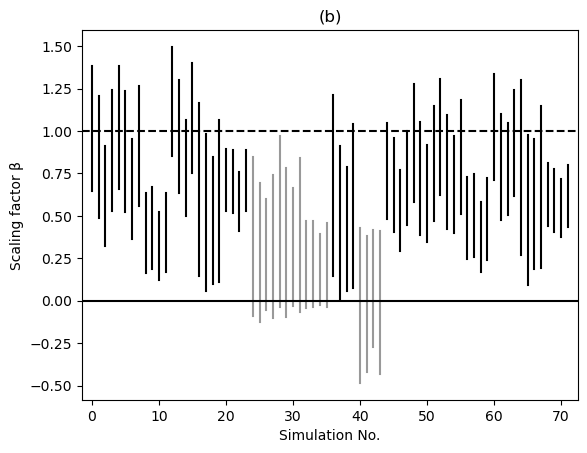

In [6]:
predict = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])

count = []
fig=plt.figure()
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)
for i in range(predict.shape[0]):

    y = obs
    x = predict[i]
    x = np.array(x)
    y = np.array(y)
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    if results.conf_int()[1,0]>0:
        color = 'k'
    else:
        color = '#999999'
    ax.plot([i,i],results.conf_int()[1],color=color)
    count.append(results.conf_int()[1][0]>0)
ax.plot([-1.5,72.5],[0,0],color='k')
ax.plot([-1.5,72.5],[1,1],color='k',linestyle='--')
ax.set_xlim([-1.5,72.5])
ax.set_title('all')
ax.set_title('(b)')
ax.set_ylabel('Scaling factor β')
ax.set_xlabel('Simulation No.')


In [7]:
index_emi = [[],[],[]]
index = 0
for emi in emi_list:
    for oh in oh_list:
        for wet in wetland_list:
            if emi =='ceds':
                index_emi[0].append(index)
            elif emi == 'edgar':
                index_emi[1].append(index)
            else:
                index_emi[2].append(index)
            index += 1

In [8]:
predict = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])
# obs
coef_list = [np.corrcoef(predict[i],obs)[0,1] for i in range(N)]
std_list =  [np.std(predict[i])/np.std(obs) for i in range(N)]

In [19]:
labelsize = 20
textsize = 15

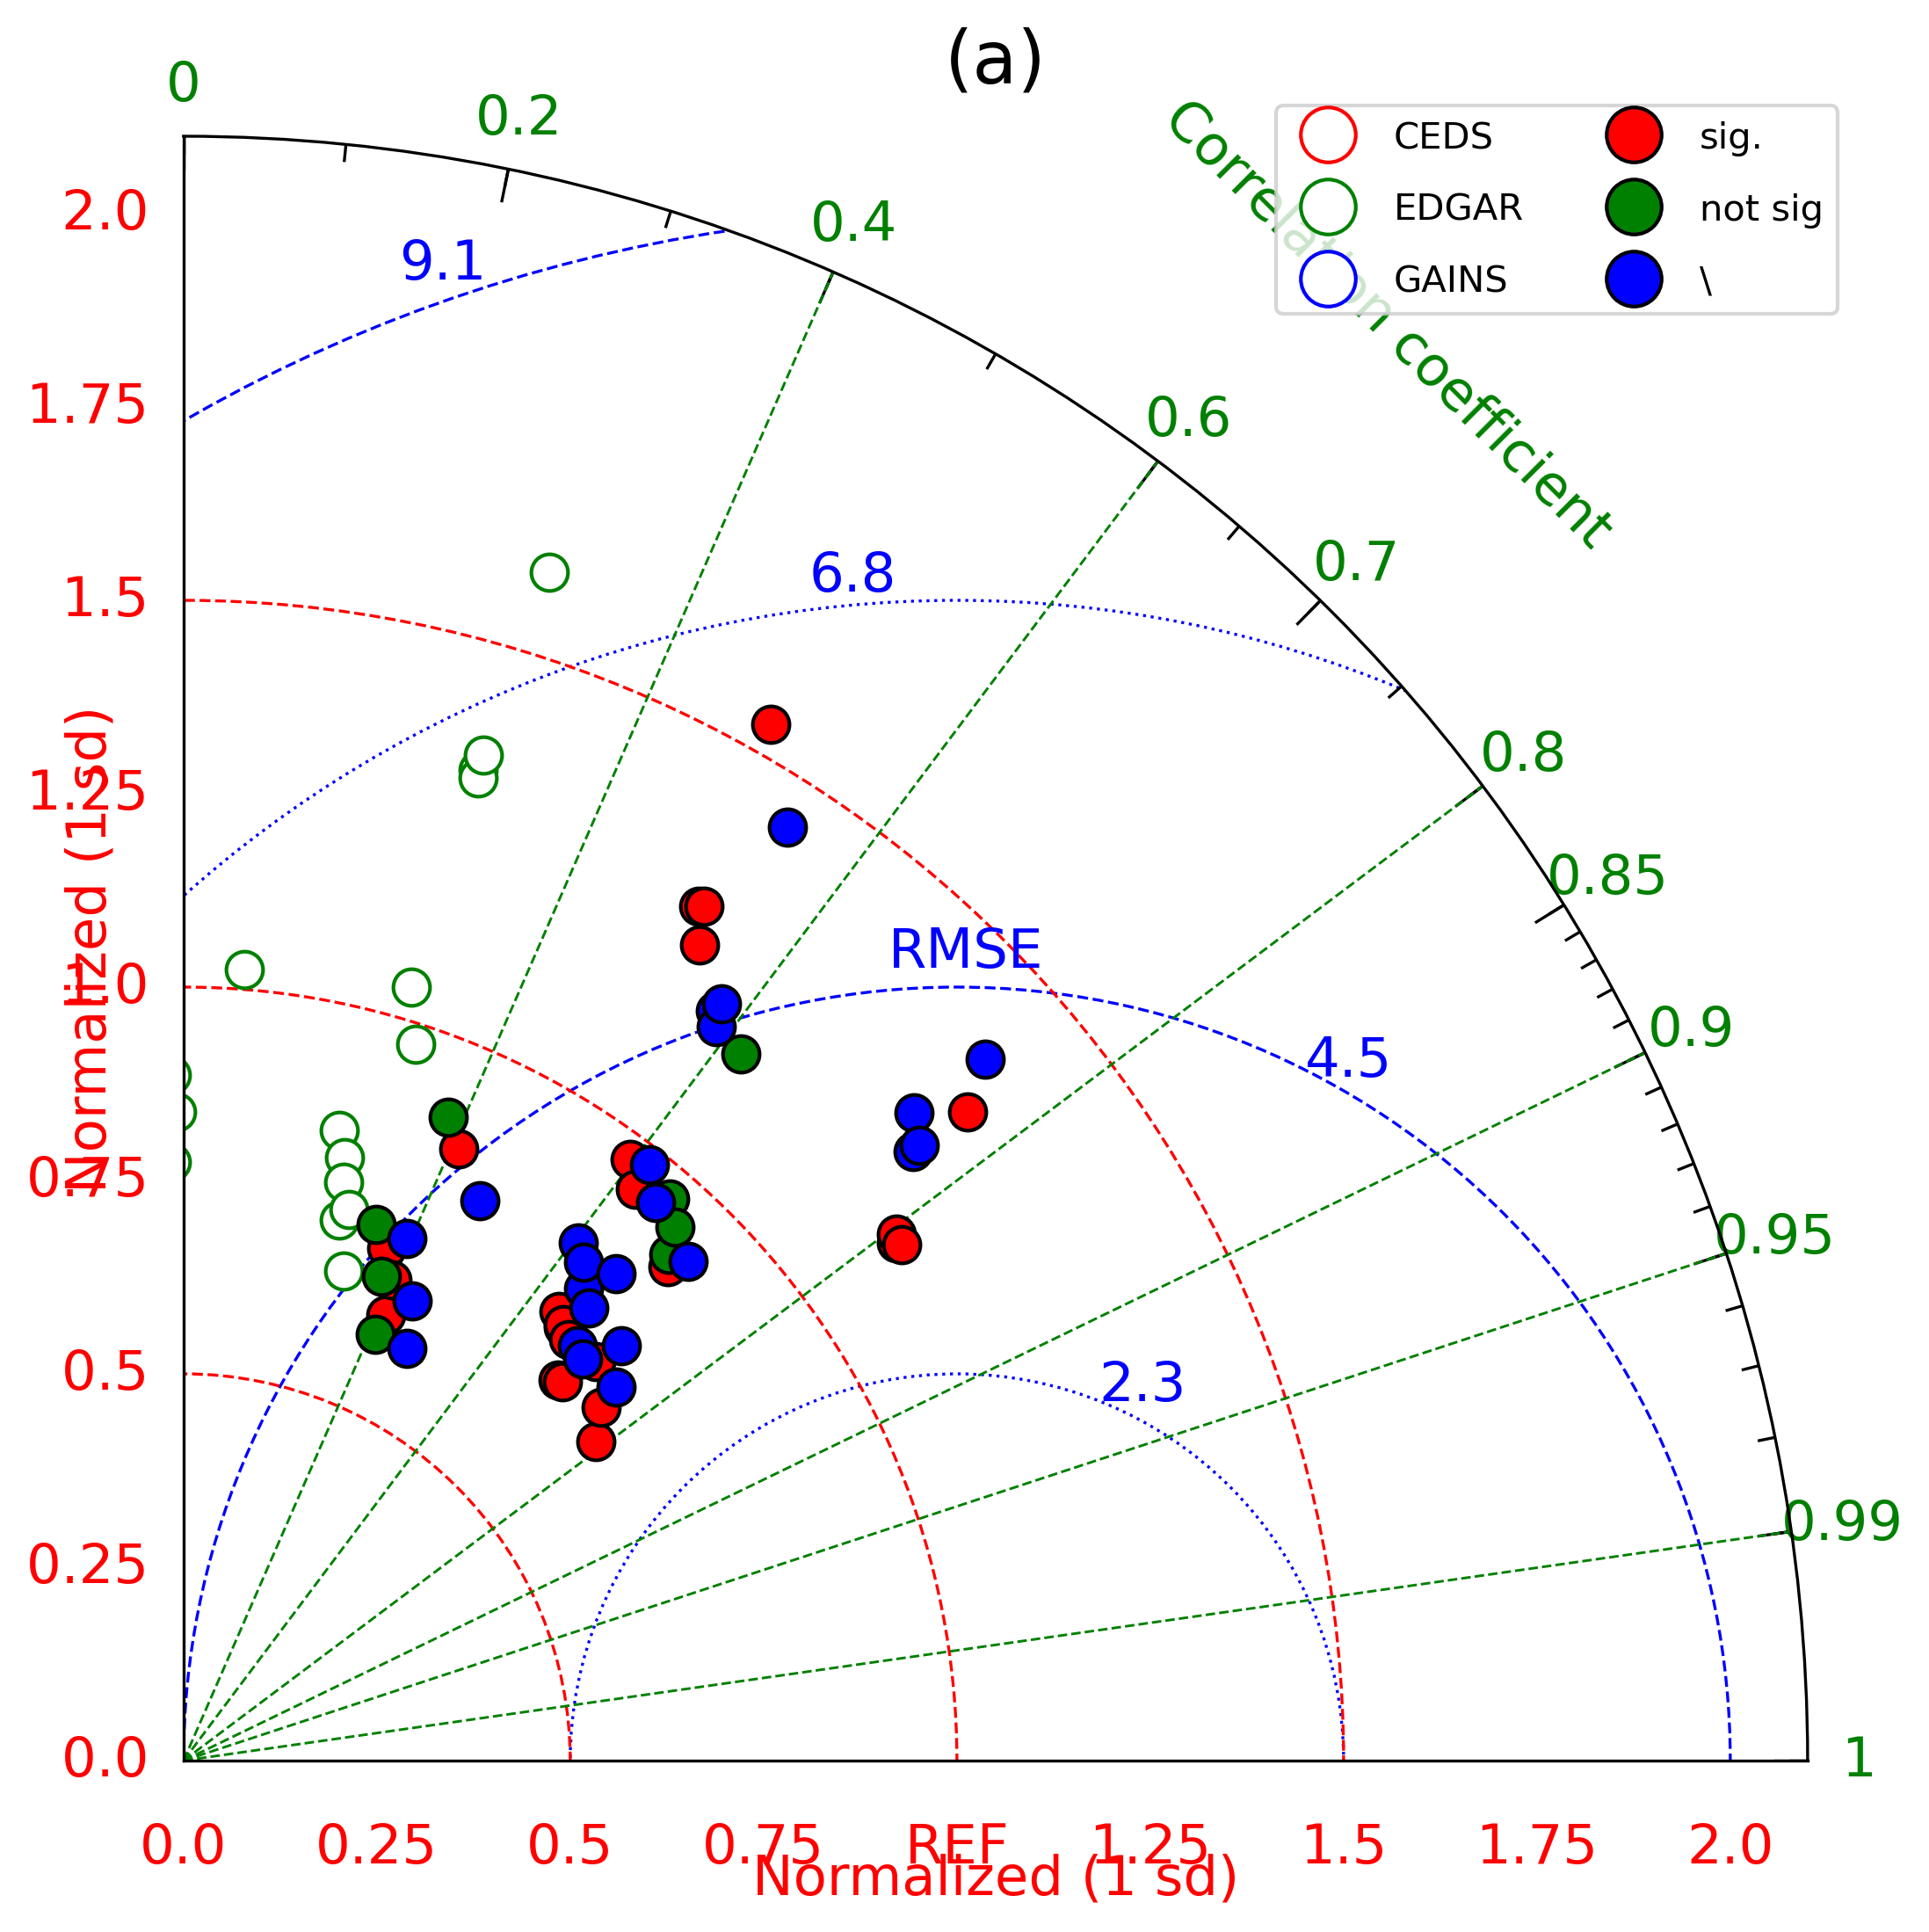

In [21]:
predict = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])
# obs
coef_list = [np.corrcoef(predict[i],obs)[0,1] for i in range(N)]
std_list =  [np.std(predict[i])/np.std(obs) for i in range(N)]

fig=plt.figure(figsize=(8,8),dpi=300)
axe = plt.subplot(1,1,1,projection='polar')
axe.set_title('(a)',fontsize=labelsize,y=1.02)
axe.set_thetalim(thetamin=0, thetamax=90)
r_small, r_big, r_interval=0,2.1,0.25
axe.set_rlim(r_small,r_big)
rad_list=[0,0.2,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.99,1]           #需要显示数值的主要R的值
minor_rad_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.86,0.87,0.88,0.89,
                0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]     #需要显示刻度的次要R的值
angle_list = np.rad2deg(np.arccos(rad_list))
angle_list_rad=np.arccos(rad_list)
angle_minor_list = np.arccos(minor_rad_list)
axe.set_thetagrids(angle_list, rad_list)

for i in np.arange(r_small, r_big, r_interval):
    if i == 1:
        axe.text(0, i, s='\n' + 'REF',  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    else:
        axe.text(0, i, s='\n' + str(i),  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    axe.text(np.pi / 2, i, s=str(i) + '  ', fontsize=textsize,color='red',
                  ha='right', va='center')  # text的第一个坐标是角度（弧度制），第二个是距离

axe.set_rgrids([])
labels = axe.get_xticklabels() + axe.get_yticklabels()


axe.grid(False)

angle_linewidth,angle_length,angle_minor_length=0.8,0.02,0.01
tick = [axe.get_rmax(), axe.get_rmax() * (1 - angle_length)]
tick_minor = [axe.get_rmax(), axe.get_rmax() * (1 - angle_minor_length)]
for t in angle_list_rad:
    axe.plot([t, t], tick, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离
for t in angle_minor_list:
    axe.plot([t, t], tick_minor, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离

circle = plt.Circle((1, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle1 = plt.Circle((1, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle2 = plt.Circle((1, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle3 = plt.Circle((1, 0), 2, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
axe.add_artist(circle)
axe.add_artist(circle1)
axe.add_artist(circle2)
axe.add_artist(circle3)
axe.text(np.deg2rad(20), 1.32, s='2.3', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(45), 1.43, s='RMSE', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(30), 1.74, s='4.5', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(60), 1.73, s='6.8', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(80), 1.93, s='9.1', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')

circle4 = plt.Circle((0, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle5 = plt.Circle((0, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle6 = plt.Circle((0, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
axe.add_artist(circle4)
axe.add_artist(circle5)
axe.add_artist(circle6)


axe.set_xlabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')
axe.set_ylabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')



axe.text(np.deg2rad(45), 2.2, s='Correlation coefficient', fontsize=textsize, ha='center', va='bottom', rotation=-45,color='green',horizontalalignment='center')
axe.plot([0,np.arccos(0.4)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.6)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.8)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.9)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.95)],[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.99)],[0,16],lw=0.7,color='green',linestyle='--')
axe.tick_params(axis='x',colors='green',labelsize=textsize)

axe.plot(float(np.arccos(0.999)),np.std(obs), '*',color='k',markersize=20)

mark ='o'

for i in range(N):
    if i in index_emi[0]:
        markeredgecolor = 'r'
        markerfacecolor = 'r'
    elif i in index_emi[1]:
        markeredgecolor = 'g'
        markerfacecolor = 'g'
    else:
        markeredgecolor = 'b'
        markerfacecolor = 'b'
    if count[i]:
        markeredgecolor = 'k'
    else:
        markerfacecolor = 'w'
    axe.plot(float(np.arccos(coef_list[i])), std_list[i], mark,
             markeredgecolor = markeredgecolor,markerfacecolor=markerfacecolor,markersize=10)
##############################
#######legend#################  
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'r',markerfacecolor='w',markersize=textsize,
        label='CEDS')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'g',markerfacecolor='w',markersize=textsize,
        label='EDGAR')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'b',markerfacecolor='w',markersize=textsize,
        label='GAINS')   
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='r',markersize=textsize,
        label='sig.') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='g',markersize=textsize,
        label='not sig')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='b',markersize=textsize,
        label='\\')    
legend = plt.legend(loc='upper right',
                    labelspacing=1, markerscale=1,bbox_to_anchor=(1.03,1.03),ncol=2)
legend.get_title().set_fontsize(fontsize=10)
#############################
#############################


fig.savefig('figs/Fig.2/Fig2.a.pdf',dpi=300)

In [11]:
index_oh = [[],[],[],
           [],[],[],]
index = 0
for emi in emi_list:
    for oh in oh_list:
        for wet in wetland_list:
            if oh =='ceds':
                index_oh[0].append(index)
            elif oh == 'edgar':
                index_oh[1].append(index)
            elif oh == 'Turner':
                index_oh[2].append(index)
            elif oh == 'Skeie':
                index_oh[3].append(index)
            elif oh == 'Nicely':
                index_oh[4].append(index)
            else:
                index_oh[5].append(index)
            index += 1

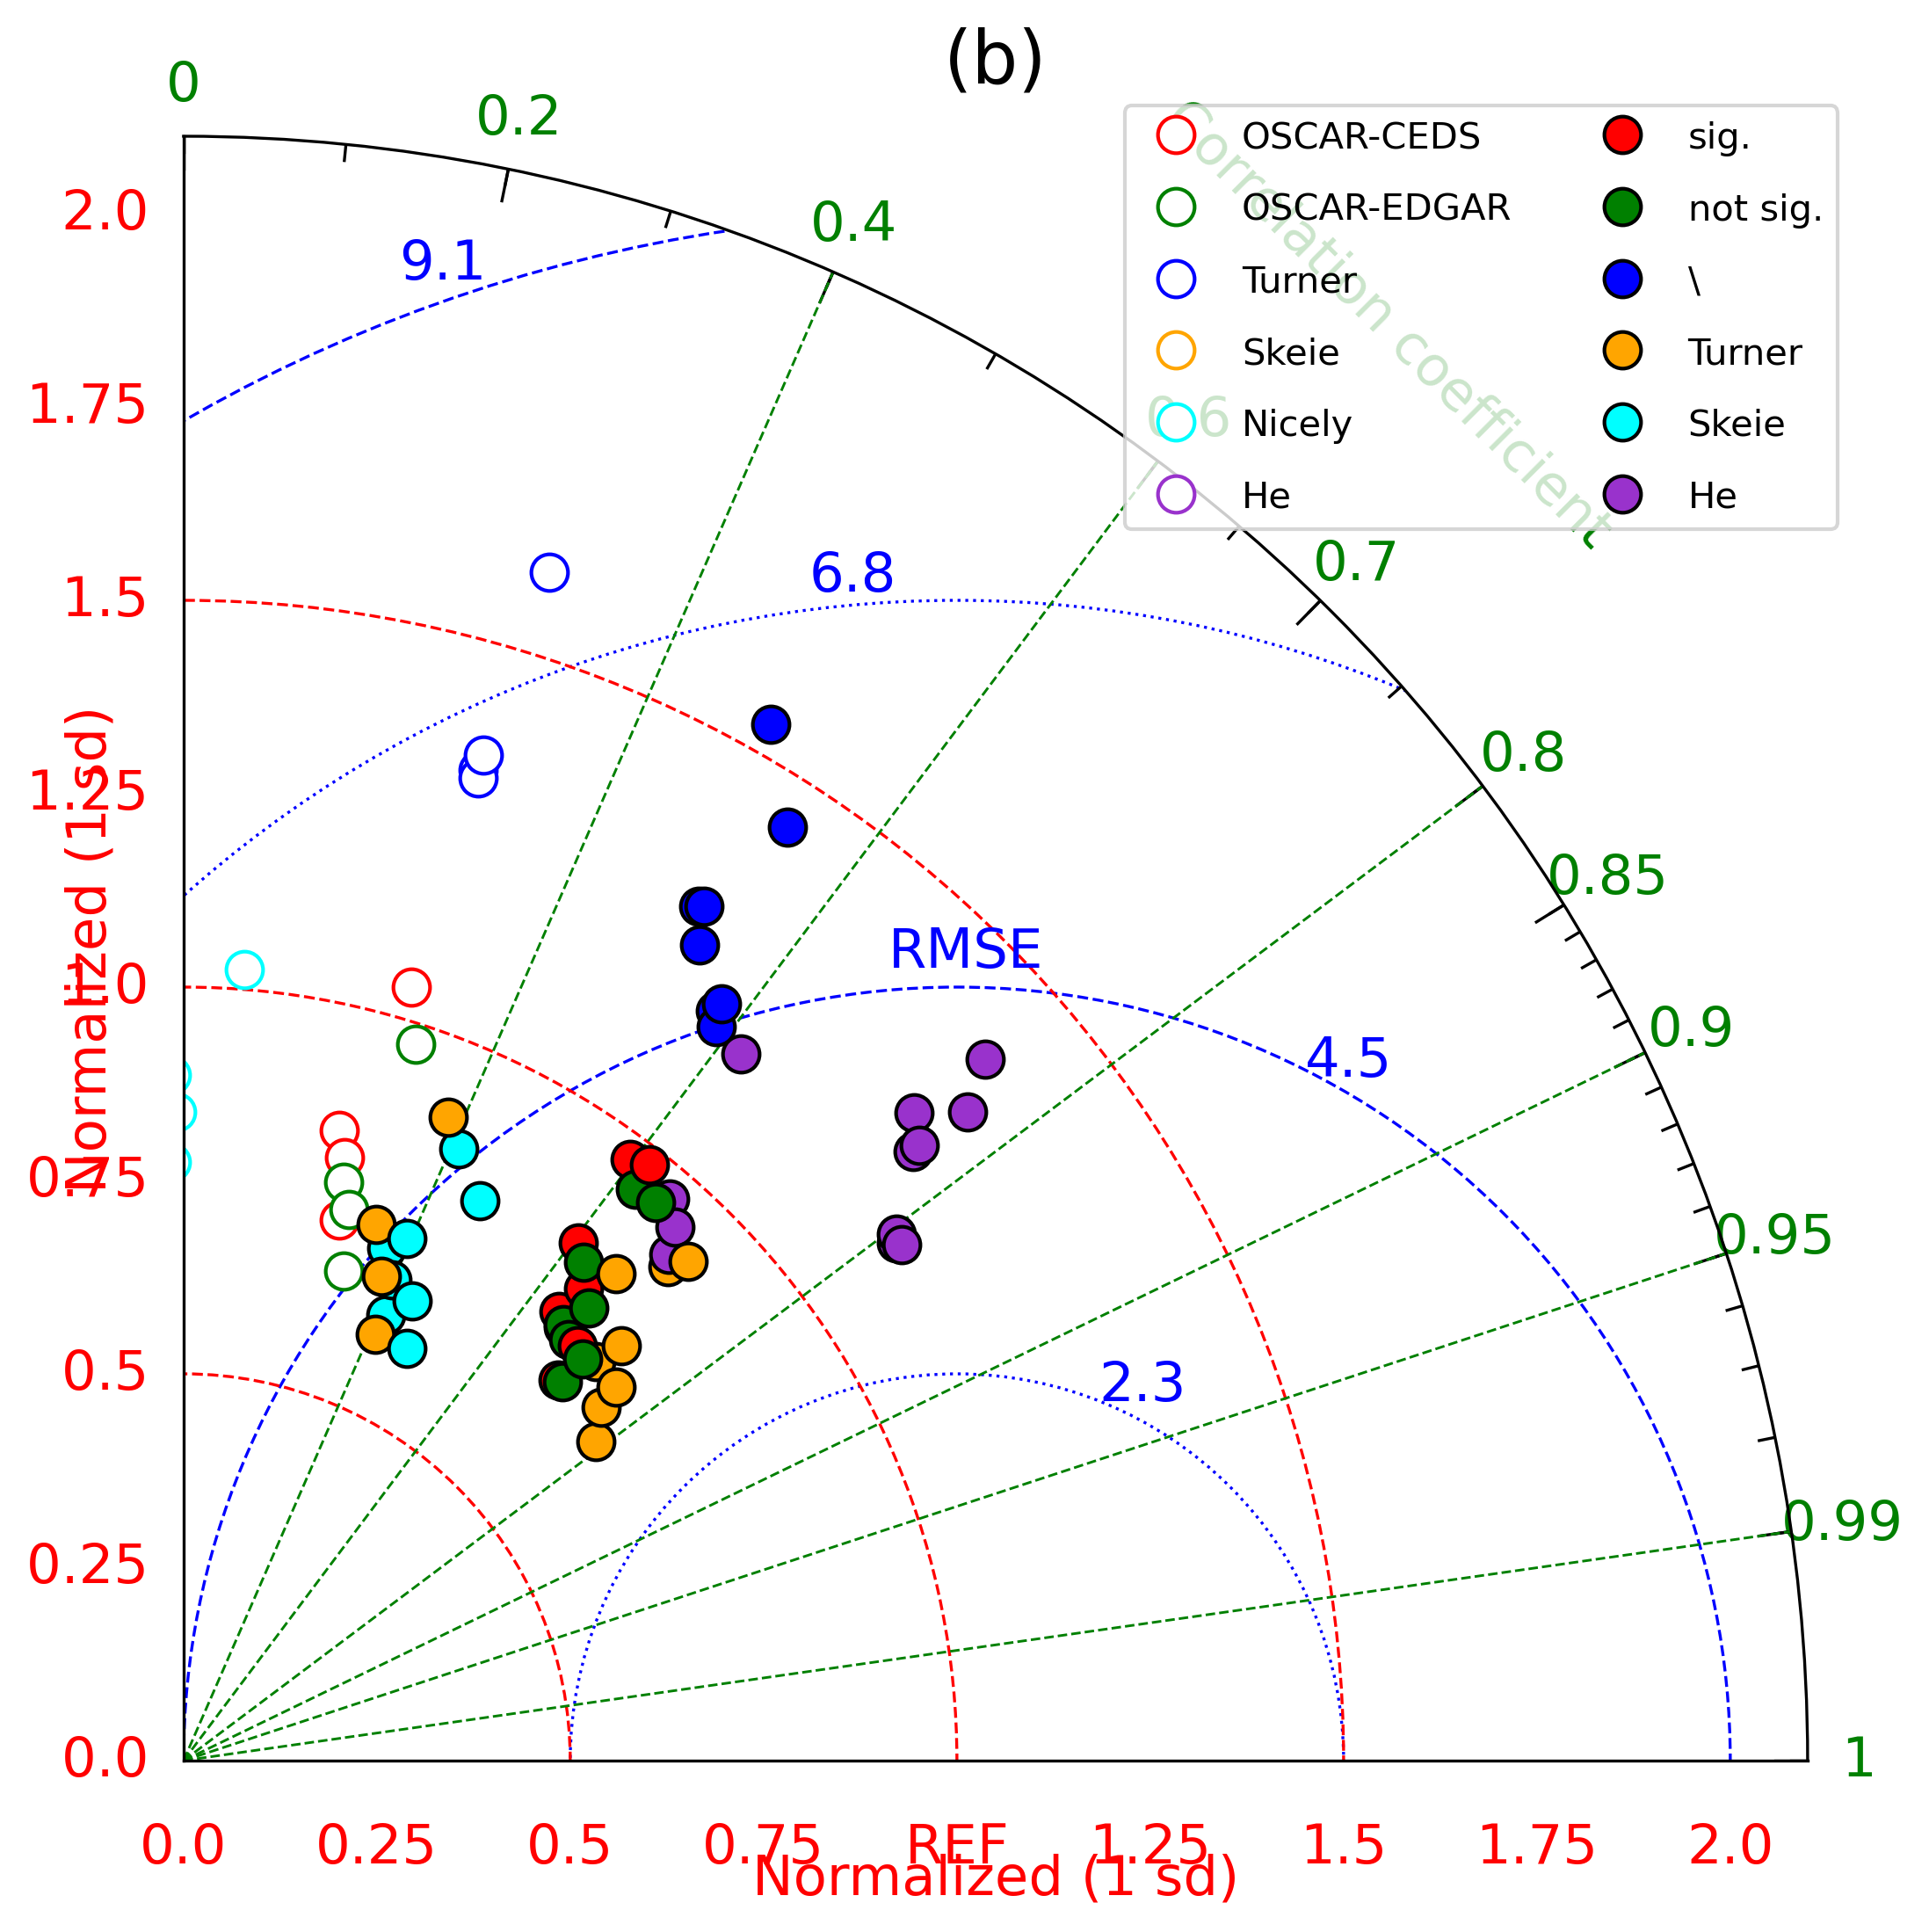

In [28]:
predict = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])
# obs
coef_list = [np.corrcoef(predict[i],obs)[0,1] for i in range(N)]
std_list =  [np.std(predict[i])/np.std(obs) for i in range(N)]

fig=plt.figure(figsize=(8,8),dpi=300)
axe = plt.subplot(1,1,1,projection='polar')
axe.set_title('(b)',fontsize=labelsize,y=1.02)
axe.set_thetalim(thetamin=0, thetamax=90)
r_small, r_big, r_interval=0,2.1,0.25
axe.set_rlim(r_small,r_big)
rad_list=[0,0.2,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.99,1]           #需要显示数值的主要R的值
minor_rad_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.86,0.87,0.88,0.89,
                0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]     #需要显示刻度的次要R的值
angle_list = np.rad2deg(np.arccos(rad_list))
angle_list_rad=np.arccos(rad_list)
angle_minor_list = np.arccos(minor_rad_list)
axe.set_thetagrids(angle_list, rad_list)

for i in np.arange(r_small, r_big, r_interval):
    if i == 1:
        axe.text(0, i, s='\n' + 'REF',  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    else:
        axe.text(0, i, s='\n' + str(i),  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    axe.text(np.pi / 2, i, s=str(i) + '  ', fontsize=textsize,color='red',
                  ha='right', va='center')  # text的第一个坐标是角度（弧度制），第二个是距离

axe.set_rgrids([])
labels = axe.get_xticklabels() + axe.get_yticklabels()


axe.grid(False)

angle_linewidth,angle_length,angle_minor_length=0.8,0.02,0.01
tick = [axe.get_rmax(), axe.get_rmax() * (1 - angle_length)]
tick_minor = [axe.get_rmax(), axe.get_rmax() * (1 - angle_minor_length)]
for t in angle_list_rad:
    axe.plot([t, t], tick, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离
for t in angle_minor_list:
    axe.plot([t, t], tick_minor, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离

circle = plt.Circle((1, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle1 = plt.Circle((1, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle2 = plt.Circle((1, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle3 = plt.Circle((1, 0), 2, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
axe.add_artist(circle)
axe.add_artist(circle1)
axe.add_artist(circle2)
axe.add_artist(circle3)
axe.text(np.deg2rad(20), 1.32, s='2.3', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(45), 1.43, s='RMSE', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(30), 1.74, s='4.5', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(60), 1.73, s='6.8', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(80), 1.93, s='9.1', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')

circle4 = plt.Circle((0, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle5 = plt.Circle((0, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle6 = plt.Circle((0, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
axe.add_artist(circle4)
axe.add_artist(circle5)
axe.add_artist(circle6)


axe.set_xlabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')
axe.set_ylabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')



axe.text(np.deg2rad(45), 2.2, s='Correlation coefficient', fontsize=textsize, ha='center', va='bottom', rotation=-45,color='green',horizontalalignment='center')
axe.plot([0,np.arccos(0.4)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.6)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.8)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.9)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.95)],[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.99)],[0,16],lw=0.7,color='green',linestyle='--')
axe.tick_params(axis='x',colors='green',labelsize=textsize)

axe.plot(float(np.arccos(0.999)),np.std(obs), '*',color='k',markersize=20)

for i in range(N):
    if i in index_oh[0]:
        markeredgecolor = 'r'
        markerfacecolor = 'r'
    elif i in index_oh[1]:
        markeredgecolor = 'g'
        markerfacecolor = 'g'
    elif i in index_oh[2]:
        markeredgecolor = 'b'
        markerfacecolor = 'b'
    elif i in index_oh[3]:
        markeredgecolor = 'orange'
        markerfacecolor = 'orange'
    elif i in index_oh[4]:
        markeredgecolor = 'cyan'
        markerfacecolor = 'cyan'
    elif i in index_oh[5]:
        markeredgecolor = 'darkorchid '
        markerfacecolor = 'darkorchid'
    else:
        markeredgecolor = 'k'
        markerfacecolor = 'k'
    if count[i]:
        markeredgecolor = 'k'
    else:
        markerfacecolor = 'w'
    axe.plot(float(np.arccos(coef_list[i])), std_list[i], mark,
             markeredgecolor = markeredgecolor,markerfacecolor=markerfacecolor,markersize=10)
##############################
#######legend#################  
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'r',markerfacecolor='w',markersize=10,
        label='OSCAR-CEDS')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'g',markerfacecolor='w',markersize=10,
        label='OSCAR-EDGAR')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'b',markerfacecolor='w',markersize=10,
        label='Turner')
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'orange',markerfacecolor='w',markersize=10,
        label='Skeie')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'cyan',markerfacecolor='w',markersize=10,
        label='Nicely')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'darkorchid',markerfacecolor='w',markersize=10,
        label='He')
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='r',markersize=10,
        label='sig.') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='g',markersize=10,
        label='not sig.')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='b',markersize=10,
        label='\\') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='orange',markersize=10,
        label='Turner') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='cyan',markersize=10,
        label='Skeie')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='darkorchid',markersize=10,
        label='He')    
legend = plt.legend(loc='upper right',
                    labelspacing=1, markerscale=1,bbox_to_anchor=(1.03,1.03),ncol=2)
legend.get_title().set_fontsize(fontsize=10)
#############################
#############################


fig.savefig('figs/Fig.2/Fig.2b.pdf',dpi=300)

In [13]:
['Skeie','Chandra','Zhang','Wetcharts']

['Skeie', 'Chandra', 'Zhang', 'Wetcharts']

In [14]:
index_wet = [[],[],[],
           [],]
index = 0
for emi in emi_list:
    for oh in oh_list:
        for wet in wetland_list:
            if wet =='Skeie':
                index_wet[0].append(index)
            elif wet == 'Chandra':
                index_wet[1].append(index)
            elif wet == 'Zhang':
                index_wet[2].append(index)
            else:
                index_wet[3].append(index)
            index += 1

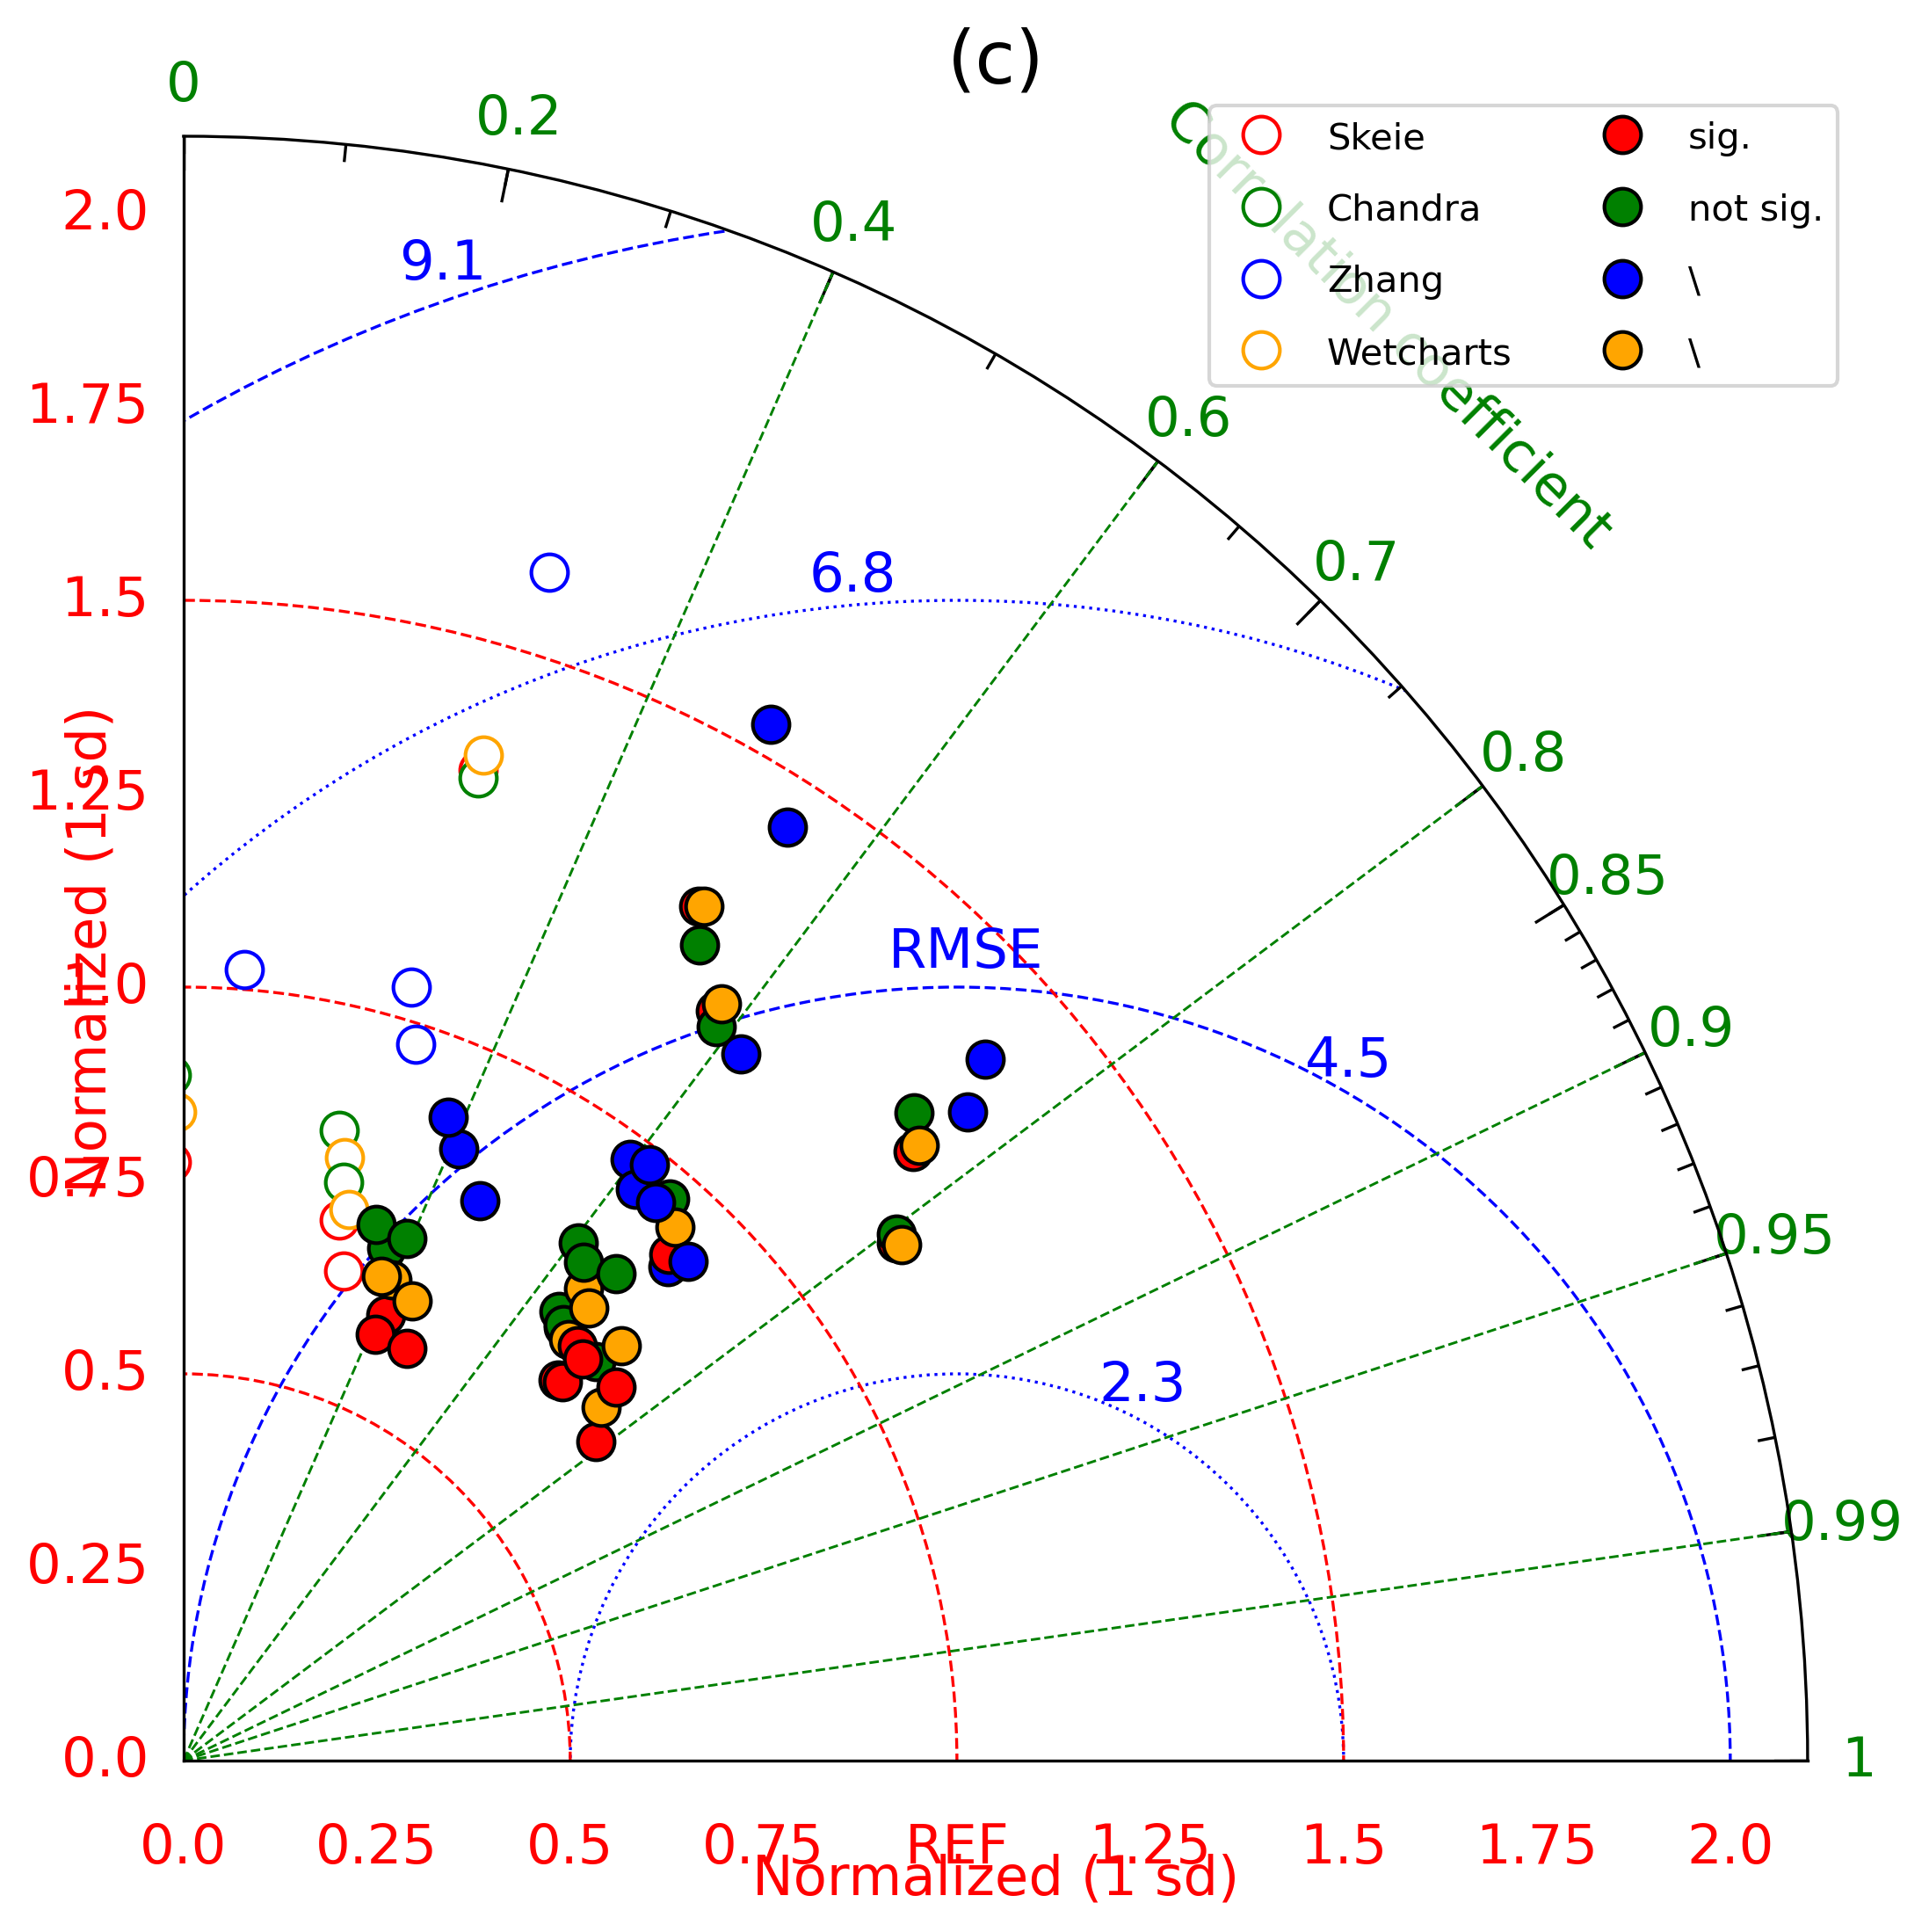

In [29]:
predict = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])
# obs
coef_list = [np.corrcoef(predict[i],obs)[0,1] for i in range(N)]
std_list =  [np.std(predict[i])/np.std(obs) for i in range(N)]

fig=plt.figure(figsize=(8,8),dpi=300)
axe = plt.subplot(1,1,1,projection='polar')
axe.set_title('(c)',fontsize=labelsize,y=1.02)
axe.set_thetalim(thetamin=0, thetamax=90)
r_small, r_big, r_interval=0,2.1,0.25
axe.set_rlim(r_small,r_big)
rad_list=[0,0.2,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.99,1]           #需要显示数值的主要R的值
minor_rad_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.86,0.87,0.88,0.89,
                0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]     #需要显示刻度的次要R的值
angle_list = np.rad2deg(np.arccos(rad_list))
angle_list_rad=np.arccos(rad_list)
angle_minor_list = np.arccos(minor_rad_list)
axe.set_thetagrids(angle_list, rad_list)

for i in np.arange(r_small, r_big, r_interval):
    if i == 1:
        axe.text(0, i, s='\n' + 'REF',  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    else:
        axe.text(0, i, s='\n' + str(i),  fontsize=textsize,color='red',
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    axe.text(np.pi / 2, i, s=str(i) + '  ', fontsize=textsize,color='red',
                  ha='right', va='center')  # text的第一个坐标是角度（弧度制），第二个是距离

axe.set_rgrids([])
labels = axe.get_xticklabels() + axe.get_yticklabels()


axe.grid(False)

angle_linewidth,angle_length,angle_minor_length=0.8,0.02,0.01
tick = [axe.get_rmax(), axe.get_rmax() * (1 - angle_length)]
tick_minor = [axe.get_rmax(), axe.get_rmax() * (1 - angle_minor_length)]
for t in angle_list_rad:
    axe.plot([t, t], tick, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离
for t in angle_minor_list:
    axe.plot([t, t], tick_minor, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离

circle = plt.Circle((1, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle1 = plt.Circle((1, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle2 = plt.Circle((1, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle=':', linewidth=0.8)
circle3 = plt.Circle((1, 0), 2, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
axe.add_artist(circle)
axe.add_artist(circle1)
axe.add_artist(circle2)
axe.add_artist(circle3)
axe.text(np.deg2rad(20), 1.32, s='2.3', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(45), 1.43, s='RMSE', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(30), 1.74, s='4.5', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(60), 1.73, s='6.8', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')
axe.text(np.deg2rad(80), 1.93, s='9.1', fontsize=textsize, ha='center', va='bottom', rotation=0,color='blue')

circle4 = plt.Circle((0, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle5 = plt.Circle((0, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle6 = plt.Circle((0, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
axe.add_artist(circle4)
axe.add_artist(circle5)
axe.add_artist(circle6)


axe.set_xlabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')
axe.set_ylabel('Normalized (1 sd)',  labelpad=18, fontsize=textsize,color='r')



axe.text(np.deg2rad(45), 2.2, s='Correlation coefficient', fontsize=textsize, ha='center', va='bottom', rotation=-45,color='green',horizontalalignment='center')
axe.plot([0,np.arccos(0.4)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.6)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.8)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.9)] ,[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.95)],[0,16],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.99)],[0,16],lw=0.7,color='green',linestyle='--')
axe.tick_params(axis='x',colors='green',labelsize=textsize)

axe.plot(float(np.arccos(0.999)),np.std(obs), '*',color='k',markersize=20)

for i in range(N):
    if i in index_wet[0]:
        markeredgecolor = 'r'
        markerfacecolor = 'r'
    elif i in index_wet[1]:
        markeredgecolor = 'g'
        markerfacecolor = 'g'
    elif i in index_wet[2]:
        markeredgecolor = 'b'
        markerfacecolor = 'b'
    elif i in index_wet[3]:
        markeredgecolor = 'orange'
        markerfacecolor = 'orange'
    else:
        markeredgecolor = 'k'
        markerfacecolor = 'k'
        
    if count[i]:
        markeredgecolor = 'k'
    else:
        markerfacecolor = 'w'
    axe.plot(float(np.arccos(coef_list[i])), std_list[i], mark,
             markeredgecolor = markeredgecolor,markerfacecolor=markerfacecolor,markersize=10)
##############################
#######legend#################  
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'r',markerfacecolor='w',markersize=10,
        label='Skeie')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'g',markerfacecolor='w',markersize=10,
        label='Chandra')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'b',markerfacecolor='w',markersize=10,
        label='Zhang')
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'orange',markerfacecolor='w',markersize=10,
        label='Wetcharts')    

axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='r',markersize=10,
        label='sig.') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='g',markersize=10,
        label='not sig.')    
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='b',markersize=10,
        label='\\') 
axe.plot(float(np.arccos(-1)), std_list[i], mark,
         markeredgecolor = 'k',markerfacecolor='orange',markersize=10,
        label='\\') 

legend = plt.legend(loc='upper right',
                    labelspacing=1, markerscale=1,bbox_to_anchor=(1.03,1.03),ncol=2)
legend.get_title().set_fontsize(fontsize=10)
#############################
#############################


fig.savefig('figs/Fig.2/Fig.2c.pdf',dpi=300)